In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
# !pip install mglearn

# Classification using k-NN 
- Example with the forge dataset ($X \in R^2$, $y \in B$)
    - The dataset consists of 26 data points with two classes (binary classification)


### (1) Generate and Plot the data

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()

/home/sujee/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [3]:
print(X.shape, y.shape)

(26, 2) (26,)


In [4]:
import warnings
warnings.filterwarnings(action='ignore')

X.shape: (26, 2)


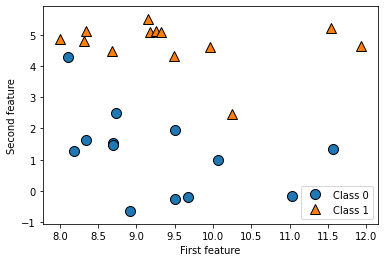

In [5]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

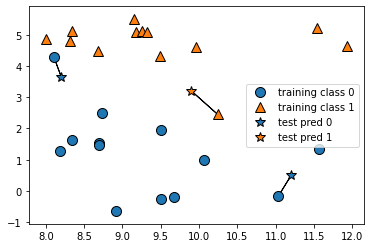

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

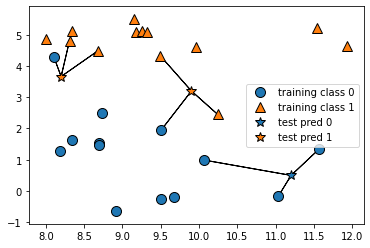

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### (2) Classification 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Make Prediction on the train set 
y_train_hat = clf.predict(X_train)

# Make Prediction on the test set
y_test_hat = clf.predict(X_test)

In [12]:
print(y_test)
print(y_test_hat)

[1 0 1 0 1 1 0]
[1 0 1 0 1 0 0]


In [13]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print('Train accuracy : %.4f'% accuracy_score(y_train,y_train_hat))
print('Test accuracy : %.4f'% accuracy_score(y_test,y_test_hat))

Train accuracy : 0.9474
Test accuracy : 0.8571


### (3) Check the effect of the hyperparameter k (n_neighbors)

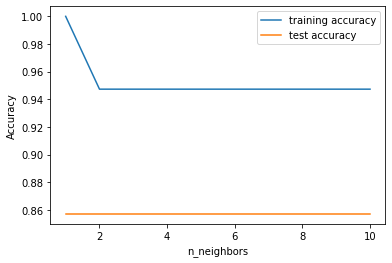

In [14]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- Decision boundaries created by the nearest neighbors model
    - Using a single neighbor (k=1) results in a decision boundary that follows the training data closely. (corresponds to high model complexity)
    - Considering more neighbors leads to a smoother decision boundary. (corresponds to low model complexity)


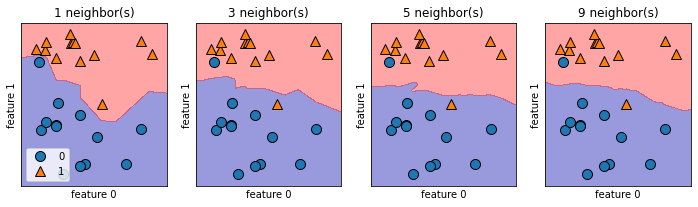

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for n_neighbors, ax in zip([1, 3, 5, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## Regression using k-NN

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [17]:
print(X.shape, y.shape)

(40, 1) (40,)


Text(0, 0.5, 'Target')

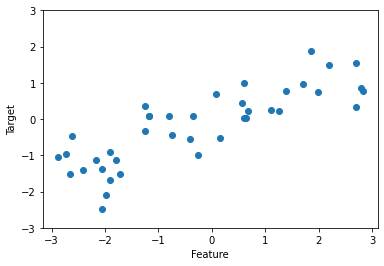

In [18]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

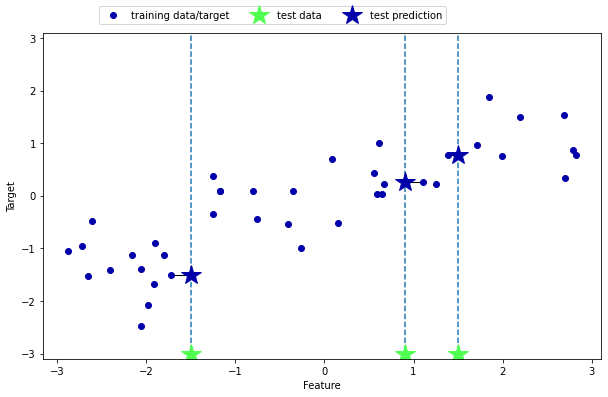

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

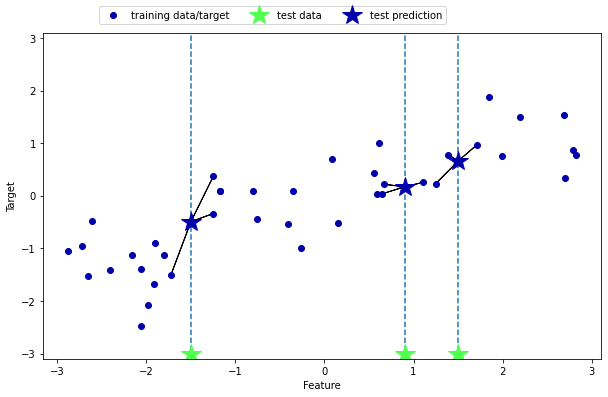

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
# define and fit the k-NN regressor
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print('Train accuracy : %.4f'% reg.score(X_train, y_train))
print('Test accuracy : %.4f'% reg.score(X_test, y_test))

Train accuracy : 0.8194
Test accuracy : 0.8344


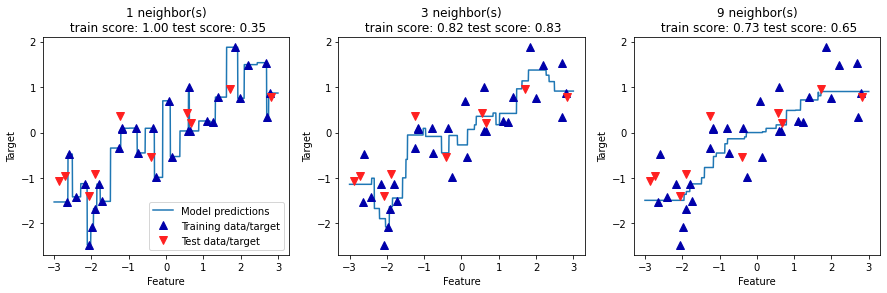

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")